In [6]:
%pip install pytesseract
import cv2
import numpy as np
import pytesseract
import os
import matplotlib.pyplot as plt

In [7]:
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [8]:
def text_area(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [9]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [10]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)


Image with Text Detection Regions:


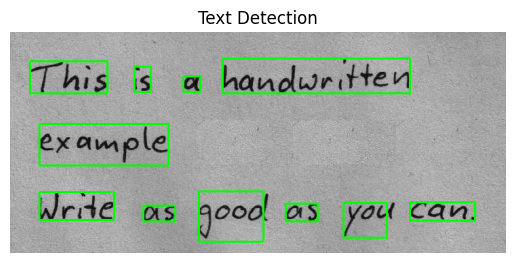


Detected Text:
This is a handwritten example Write as qooal as you can,


In [12]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

img_path = "/content/sample_data/Sample-handwritten-text-input-for-OCR.png"

image_loaded = cv2.imread(img_path)

if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:

    preprocessed_image = process_image(image_loaded)

    text_boxes = text_area(preprocessed_image)

    image_with_boxes = mark_text_regions(image_loaded.copy(), text_boxes)

    print("\nImage with Text Detection Regions:")
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Text Detection")
    plt.show()

    extracted_text = extract_text(text_boxes)

    print("\nText:")
    print(extracted_text)